In [1]:
import pandas as pd
from pandarallel import pandarallel
pandarallel.initialize()
pd.set_option('max_colwidth', 140)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [2]:
# data = pd.read_csv("kata/emotionData.csv")
data = pd.read_excel("dataset/DATA SET VAKSINASI.xlsx")
# data = data[data.label != 'anger']
data

,0,1,tweet,3,4,7,positif,negatif,score
0,https://twitter.com/utridalimunthe/status/1380290145597878274,2021-04-08 22:43:09+00:00,"Tahun 2020 lalu, hampir tiap hari sejak Agustus 2020 ada pengumuman orang meninggal dari mesjid gang rumah. Bikin was2 dengerinnyaaa.\nT...",1.380000e+18,utridalimunthe,[],NaN,NaN,0
1,https://twitter.com/11hayati05/status/1380271305757392899,2021-04-08 21:28:18+00:00,Dia punyaa seram sejuk badan lepas covid vaksin ni tkleh bawak bincang. Cepat laa hbis night 😪,1.380000e+18,11hayati05,[],NaN,NaN,0
2,https://twitter.com/Nsrllimn/status/1380224040397275137,2021-04-08 18:20:29+00:00,vaksin covid ni macam takde function je daftar babi dah berapa bulan ni suntikan untuk rakyat macam takde jalan langsung,1.380000e+18,Nsrllimn,[],NaN,1.0,-1
3,https://twitter.com/iqbalMnasir/status/1380210264545447936,2021-04-08 17:25:44+00:00,Dulu bangga handle covid. Sekarang punya lah lembab nak bagi vaksin. Negara mana tu?,1.380000e+18,iqbalMnasir,[],NaN,NaN,0
4,https://twitter.com/AlbertSolo2/status/1380200844272889858,2021-04-08 16:48:18+00:00,"Pemerintah India di kabarkan akan kembali mengekspor vaksin Astra Zeneka pada Juni mendatang, pemerintah Indonesia sepertinya harus menu...",1.380000e+18,AlbertSolo2,[],NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
9995,https://twitter.com/motizenchannel/status/1348973507971928076,2021-01-12 12:42:01+00:00,"Sobat, mau tanya siapa sih vendor di balik impor vaksin Covid? Karena vaksin adalah bisnis besar, bahkan menyangkut perlombaan geopoliti...",1.350000e+18,motizenchannel,[],NaN,NaN,0
9996,https://twitter.com/BisnisOnlineGue/status/1348972716456509442,2021-01-12 12:38:52+00:00,"MBlo,\nnanti kalau ada yang ajak nikah, Pastikan sudah di vaksin covid yaa\nBahaya kan kalau ciuman,",1.350000e+18,BisnisOnlineGue,[],NaN,NaN,0
9997,https://twitter.com/BisnisOnlineGue/status/1348971498296336384,2021-01-12 12:34:02+00:00,"Vaksin Covid 19 , seperti nya akan menjadi hal \nwajib dilakukan pasutri yang akan menikah ...\nSelain screen kesehatan",1.350000e+18,BisnisOnlineGue,[],NaN,NaN,0
9998,https://twitter.com/rayalwi8/status/1348970779296231426,2021-01-12 12:31:11+00:00,"Debat di grup keluarga grgr vaksin, lawannya bapak” yg ga percaya covid dan intinya nolak vaksin dan protokol kesehatan. Waktu debat pak...",1.350000e+18,rayalwi8,[],1.0,NaN,1


In [3]:
data.reset_index(drop=True, inplace=True)

In [4]:
data.groupby('score')['tweet'].nunique()

score
-1     642
 0    6773
 1    2339
Name: tweet, dtype: int64

In [5]:
data

,0,1,tweet,3,4,7,positif,negatif,score
0,https://twitter.com/utridalimunthe/status/1380290145597878274,2021-04-08 22:43:09+00:00,"Tahun 2020 lalu, hampir tiap hari sejak Agustus 2020 ada pengumuman orang meninggal dari mesjid gang rumah. Bikin was2 dengerinnyaaa.\nT...",1.380000e+18,utridalimunthe,[],NaN,NaN,0
1,https://twitter.com/11hayati05/status/1380271305757392899,2021-04-08 21:28:18+00:00,Dia punyaa seram sejuk badan lepas covid vaksin ni tkleh bawak bincang. Cepat laa hbis night 😪,1.380000e+18,11hayati05,[],NaN,NaN,0
2,https://twitter.com/Nsrllimn/status/1380224040397275137,2021-04-08 18:20:29+00:00,vaksin covid ni macam takde function je daftar babi dah berapa bulan ni suntikan untuk rakyat macam takde jalan langsung,1.380000e+18,Nsrllimn,[],NaN,1.0,-1
3,https://twitter.com/iqbalMnasir/status/1380210264545447936,2021-04-08 17:25:44+00:00,Dulu bangga handle covid. Sekarang punya lah lembab nak bagi vaksin. Negara mana tu?,1.380000e+18,iqbalMnasir,[],NaN,NaN,0
4,https://twitter.com/AlbertSolo2/status/1380200844272889858,2021-04-08 16:48:18+00:00,"Pemerintah India di kabarkan akan kembali mengekspor vaksin Astra Zeneka pada Juni mendatang, pemerintah Indonesia sepertinya harus menu...",1.380000e+18,AlbertSolo2,[],NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
9995,https://twitter.com/motizenchannel/status/1348973507971928076,2021-01-12 12:42:01+00:00,"Sobat, mau tanya siapa sih vendor di balik impor vaksin Covid? Karena vaksin adalah bisnis besar, bahkan menyangkut perlombaan geopoliti...",1.350000e+18,motizenchannel,[],NaN,NaN,0
9996,https://twitter.com/BisnisOnlineGue/status/1348972716456509442,2021-01-12 12:38:52+00:00,"MBlo,\nnanti kalau ada yang ajak nikah, Pastikan sudah di vaksin covid yaa\nBahaya kan kalau ciuman,",1.350000e+18,BisnisOnlineGue,[],NaN,NaN,0
9997,https://twitter.com/BisnisOnlineGue/status/1348971498296336384,2021-01-12 12:34:02+00:00,"Vaksin Covid 19 , seperti nya akan menjadi hal \nwajib dilakukan pasutri yang akan menikah ...\nSelain screen kesehatan",1.350000e+18,BisnisOnlineGue,[],NaN,NaN,0
9998,https://twitter.com/rayalwi8/status/1348970779296231426,2021-01-12 12:31:11+00:00,"Debat di grup keluarga grgr vaksin, lawannya bapak” yg ga percaya covid dan intinya nolak vaksin dan protokol kesehatan. Waktu debat pak...",1.350000e+18,rayalwi8,[],1.0,NaN,1


In [6]:
idiom = pd.read_csv("kata/idioms_id.txt", sep=":")
idiom

,tweet,score
0,acungi jempol,5
1,anak alay,-4
2,anak emas,4
3,banting tulang,2
4,banyak akal,4
...,...,...
87,terima kasih,4
88,tinggi hati,-4
89,tuhan memberkati,5
90,tukang tipu,-5


In [7]:
emoticon = pd.read_csv("kata/emoticon_id.txt", sep='\s\|\s', engine='python')
emoticon

,emot,score
0,^^v,4
1,^_^,4
2,xp,-4
3,^^V,4
4,xd,2
...,...,...
624,x-(,-4
625,xd,2
626,xo,2
627,xp,-4


In [8]:
kata = pd.read_csv("kata/sentiWord.txt", sep=":")
kata

,tweet,score
0,abadi,5
1,absen,-3
2,abu-abu,-1
3,acuh,4
4,adil,5
...,...,...
1724,wow,4
1725,wtf,-4
1726,yatim,-1
1727,yeah,3


In [9]:
akronim = pd.read_csv("kata/akronim.csv", usecols=['slang', 'formal'])
akronim

,slang,formal
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa
...,...,...
15001,gataunya,enggak taunya
15002,gtau,enggak tau
15003,gatau,enggak tau
15004,fans2,fan-fan


In [10]:
stoplist = pd.read_csv("kata/stoplist.txt")
stoplist

,word
0,ada
1,adalah
2,adanya
3,adapun
4,agak
...,...
753,wong
754,yaitu
755,yakin
756,yakni


In [11]:
negasi = pd.read_csv("kata/negatingword.txt")
negasi

,word
0,belum
1,bukan
2,tak
3,tanpa
4,tidak
5,pantang
6,jangan
7,bukanlah
8,sok
9,tidak pernah


In [12]:
def anything_to_sentiment(anything):
    if type(anything) == str:
        if anything in ['love', 'happy']:
            return 'pos'
        elif anything in ['fear', 'sadness']:
            return 'neg'
    elif type(anything) == int:
        if anything > 0:
            return 'pos'
        elif anything < 0:
            return 'neg'

In [13]:
data['sentiment'] = data['score'].astype(int).apply(anything_to_sentiment)
data.to_csv('sentimentedKata/tweetSent.csv', index=False)
data

,0,1,tweet,3,4,7,positif,negatif,score,sentiment
0,https://twitter.com/utridalimunthe/status/1380290145597878274,2021-04-08 22:43:09+00:00,"Tahun 2020 lalu, hampir tiap hari sejak Agustus 2020 ada pengumuman orang meninggal dari mesjid gang rumah. Bikin was2 dengerinnyaaa.\nT...",1.380000e+18,utridalimunthe,[],NaN,NaN,0,None
1,https://twitter.com/11hayati05/status/1380271305757392899,2021-04-08 21:28:18+00:00,Dia punyaa seram sejuk badan lepas covid vaksin ni tkleh bawak bincang. Cepat laa hbis night 😪,1.380000e+18,11hayati05,[],NaN,NaN,0,None
2,https://twitter.com/Nsrllimn/status/1380224040397275137,2021-04-08 18:20:29+00:00,vaksin covid ni macam takde function je daftar babi dah berapa bulan ni suntikan untuk rakyat macam takde jalan langsung,1.380000e+18,Nsrllimn,[],NaN,1.0,-1,neg
3,https://twitter.com/iqbalMnasir/status/1380210264545447936,2021-04-08 17:25:44+00:00,Dulu bangga handle covid. Sekarang punya lah lembab nak bagi vaksin. Negara mana tu?,1.380000e+18,iqbalMnasir,[],NaN,NaN,0,None
4,https://twitter.com/AlbertSolo2/status/1380200844272889858,2021-04-08 16:48:18+00:00,"Pemerintah India di kabarkan akan kembali mengekspor vaksin Astra Zeneka pada Juni mendatang, pemerintah Indonesia sepertinya harus menu...",1.380000e+18,AlbertSolo2,[],NaN,NaN,0,None
...,...,...,...,...,...,...,...,...,...,...
9995,https://twitter.com/motizenchannel/status/1348973507971928076,2021-01-12 12:42:01+00:00,"Sobat, mau tanya siapa sih vendor di balik impor vaksin Covid? Karena vaksin adalah bisnis besar, bahkan menyangkut perlombaan geopoliti...",1.350000e+18,motizenchannel,[],NaN,NaN,0,None
9996,https://twitter.com/BisnisOnlineGue/status/1348972716456509442,2021-01-12 12:38:52+00:00,"MBlo,\nnanti kalau ada yang ajak nikah, Pastikan sudah di vaksin covid yaa\nBahaya kan kalau ciuman,",1.350000e+18,BisnisOnlineGue,[],NaN,NaN,0,None
9997,https://twitter.com/BisnisOnlineGue/status/1348971498296336384,2021-01-12 12:34:02+00:00,"Vaksin Covid 19 , seperti nya akan menjadi hal \nwajib dilakukan pasutri yang akan menikah ...\nSelain screen kesehatan",1.350000e+18,BisnisOnlineGue,[],NaN,NaN,0,None
9998,https://twitter.com/rayalwi8/status/1348970779296231426,2021-01-12 12:31:11+00:00,"Debat di grup keluarga grgr vaksin, lawannya bapak” yg ga percaya covid dan intinya nolak vaksin dan protokol kesehatan. Waktu debat pak...",1.350000e+18,rayalwi8,[],1.0,NaN,1,pos


In [14]:
idiom['sentiment'] = idiom['score'].astype(int).apply(anything_to_sentiment)
idiom.to_csv('sentimentedKata/idiom.csv', index=False)
idiom.groupby('sentiment')['tweet'].nunique()

sentiment
neg    49
pos    43
Name: tweet, dtype: int64

In [15]:
emoticon['sentiment'] = emoticon['score'].astype(int).apply(anything_to_sentiment)
emoticon.to_csv('sentimentedKata/emoticon.csv', index=False)
emoticon.groupby('sentiment')['emot'].nunique()

sentiment
neg    52
pos    45
Name: emot, dtype: int64

In [16]:
kata['sentiment'] = kata['score'].astype(int).apply(anything_to_sentiment)
kata.to_csv('sentimentedKata/kata.csv', index=False)
kata.groupby('sentiment')['tweet'].nunique()

sentiment
neg    1212
pos     517
Name: tweet, dtype: int64

In [17]:
kamusAlay = dict(zip(akronim.slang, akronim.formal))
punct = '!"#$%&\'()*+,./:;<=>?@\\^_`{|}~'

def slang_to_formal(tweet):
    tweet = tweet.translate(str.maketrans(punct, len(punct)*" "))
    slang = tweet.split()
    formal = []
    for word in slang:
        if not word.isdigit():
            if word in kamusAlay:
                formal.extend(kamusAlay[word].split())
            else:
                formal.append(word)
    return " ".join(formal)

In [18]:
import re


def make_pattern(text):
    pattern = "|".join(map(re.escape, text))
    pattern = r"(?u)(?<=\s)(" + pattern + ")(?=\s)"
#                "(?<=\s)(" + pattern + ")",
#                "(" + pattern + ")(?=\s)"]
    return re.compile(pattern)


bannedWord = ['vaksinasi']
#              ,'baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'not', 'nya', 'olah', 'sekurang', 'tama'
#              ]
stop = stoplist.word.to_list() + bannedWord
neg_emot = make_pattern(emoticon.emot[emoticon.sentiment == 'neg'][::-1])
pos_emot = make_pattern(emoticon.emot[emoticon.sentiment == 'pos'][::-1])
negate = make_pattern(negasi.word.to_list())
url = re.compile(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?\xab\xbb\u201c\u201d\u2018\u2019]))')
username = "@\w{1,}"
hashtag = "#\w{1,}"
tags = ['[neg]', '[pos]', '[url]', '[username]', '[not]']
patterns = [neg_emot, pos_emot, url, username, hashtag, negate, stop]
# database = dict(zip(tags, patterns))

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()


def replace_with_tag(tweet):
    tweet = tweet.lower()
#     tweet = ' '.join(word_tokenize(tweet))
    tweet = re.sub(url, ' [url] ', tweet)
    tweet = re.sub(username, ' [username] ', tweet)
    tweet = re.sub(hashtag, ' ', tweet)
    tweet = re.sub(neg_emot, ' [neg] ', tweet)
    tweet = re.sub(pos_emot, ' [pos] ', tweet)
    tweet = slang_to_formal(tweet)
    tweet = stemmer.stem(tweet)
    tweet = re.sub(negate, ' [not] ', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    tweet = re.sub(' +', ' ', tweet)
    return tweet



In [19]:
# datas = [pd.read_csv('sentimentedKata/tweetSent.csv'), pd.read_csv('sentimentedKata/idiom.csv'),
#          pd.read_csv('sentimentedKata/kata.csv')]

dataCleaned = pd.read_csv('sentimentedKata/tweetSent.csv')
dataCleaned = dataCleaned[dataCleaned.score != 0]
dataCleaned.drop_duplicates(subset='tweet', keep='first', inplace=True)
dataCleaned.reset_index(drop=True, inplace=True)
dataCleaned.groupby('sentiment')['tweet'].nunique()
# dataCleaned

sentiment
neg     642
pos    2339
Name: tweet, dtype: int64

In [20]:
# pos_data = dataCleaned[dataCleaned.sentiment == 'pos']
# neg_data = dataCleaned[dataCleaned.sentiment == 'neg']
# len(neg_data)

In [21]:

# pos_data, neg_data = sampler.fit_resample(pos_data, neg_data)
# # dataCleaned.groupby('sentiment')['tweet'].nunique()
# len(neg_data)

In [22]:
import random
import numpy as np
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer


text_vect = TfidfVectorizer(use_idf=True, binary=True)

tweet = dataCleaned['tweet'].values
sent = dataCleaned['sentiment'].values

In [23]:
# vocab = pd.read_csv('serangkai/kamus-kata-dasar.csv')
# vocab
# stop

In [24]:
# from imblearn.over_sampling import SMOTE
# sampler = SMOTE()
text_vect.stop_words = stop
# text_vect.vocabulary = vocab
text_vect.preprocessor = replace_with_tag
# text_vect.ngram_range = (1, 3)
# text_vect.min_df = 0.05
text_vect.token_pattern = r'(?u)\[\w{3,}\]|\b\w{4,}\-?\w+\b'
data_ = text_vect.fit_transform(tweet)
# data_, sent = sampler.fit_resample(data_, sent)
# text_vect.get_feature_names()
pd.DataFrame(data_.toarray(), columns=text_vect.get_feature_names())

/Users/ilpez/miniforge3/envs/twitter-sentiment-analysis/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['hadap', 'jenak', 'kerja', 'khusus', 'langsung', 'lihat', 'maksud', 'masuk', 'nyata', 'orang', 'sampa', 'sangkut', 'sekal', 'sekira', 'utama'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,[not],aaaaaaa,aaaahh,aaahhh,aamiiiin,aamiin,aamiinn,aammiiinnnn,abal-abal,abang,...,yuhuuu,yuhuw,yutub,zainul,zaman,zamzam,zayad,zeneca,zinah,zombie
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.165057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2978,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2979,0.091421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


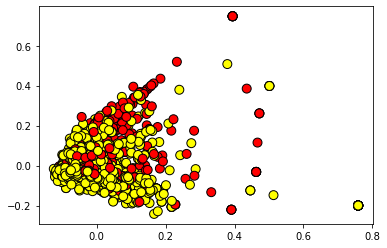

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

scores = []
data__ = pca.fit_transform(data_.todense())

for s in sent:
    if s == 'pos':
        scores.append(1)
    elif s == 'neg':
        scores.append(-1)

XX = data__[:, 0]
YY = data__[:, 1]

# XX, YY = sampler.fit_resample(XX.astype('int32'), YY.astype('int32'))

plt.scatter(XX,
            YY,
            c=scores,
            cmap='autumn',
            s=80,
            edgecolor='k'
           )
plt.show()

In [26]:
len(text_vect.get_feature_names())

4438

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_, sent, test_size=0.2, random_state=8)
# text_clf.fit(tweet, sent)

In [28]:
# text_clf.fit(X_train, y_train)
# text_clf.score(X_test, y_test)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
text_clf = SVC(kernel='rbf')

tuned_params = {'gamma':[1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
                'C':[1, 10, 100, 1000],
               }
gs_clv = GridSearchCV(text_clf, tuned_params)
gs_clv.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05]})

In [29]:
pd.DataFrame(gs_clv.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.152859,0.003048,0.032235,0.000389,10,0.1,"{'C': 10, 'gamma': 0.1}",0.807128,0.823899,0.819706,0.790356,0.808824,0.809983,0.011687,1
17,0.143280,0.001071,0.030456,0.000297,1000,0.001,"{'C': 1000, 'gamma': 0.001}",0.800839,0.823899,0.813417,0.794549,0.798319,0.806205,0.010881,2
11,0.144764,0.003355,0.030636,0.000417,100,0.01,"{'C': 100, 'gamma': 0.01}",0.800839,0.823899,0.813417,0.790356,0.800420,0.805786,0.011642,3
12,0.139419,0.001104,0.030436,0.000253,100,0.001,"{'C': 100, 'gamma': 0.001}",0.796646,0.800839,0.815514,0.790356,0.804622,0.801595,0.008417,4
18,0.139272,0.002671,0.030836,0.000735,1000,0.0001,"{'C': 1000, 'gamma': 0.0001}",0.796646,0.800839,0.815514,0.790356,0.804622,0.801595,0.008417,4
6,0.139565,0.000827,0.030555,0.000238,10,0.01,"{'C': 10, 'gamma': 0.01}",0.794549,0.800839,0.813417,0.790356,0.802521,0.800336,0.007864,6
0,0.145394,0.002029,0.031664,0.000396,1,0.1,"{'C': 1, 'gamma': 0.1}",0.788260,0.790356,0.802935,0.790356,0.794118,0.793205,0.005219,7
10,0.198007,0.003426,0.030299,0.000500,100,0.1,"{'C': 100, 'gamma': 0.1}",0.788260,0.815514,0.792453,0.761006,0.785714,0.788589,0.017373,8
15,0.198864,0.002397,0.029940,0.000486,1000,0.1,"{'C': 1000, 'gamma': 0.1}",0.786164,0.815514,0.788260,0.765199,0.781513,0.787330,0.016249,9
14,0.117934,0.000613,0.025746,0.000227,100,0.00001,"{'C': 100, 'gamma': 1e-05}",0.784067,0.784067,0.786164,0.786164,0.785714,0.785235,0.000968,10


In [30]:
text = tweet[77]
analyzer = text_vect.build_analyzer()
vectored = text_vect.transform([text])
print(text)
print(analyzer(text))
print(vectored)
gs_clv.predict(vectored)

Sampe titik darah akhir juga gua gak bakal ngebiarin tubuh gua dimasukin barang haram vaksin covid itu.
Kalopun itu harus, gua lebih milih dor pala gua hari itu jugaa.
WKWKWKWK
['titik', 'darah', 'tubuh', 'masuk', 'barang', 'haram', 'vaksin', 'covid', 'pilih', 'kepala', 'wkwkwkwk']
  (0, 4356)	0.41464789285953674
  (0, 4257)	0.05268713088612147
  (0, 4154)	0.259224239083897
  (0, 4095)	0.3782746232424975
  (0, 3083)	0.28881705387313183
  (0, 2359)	0.23169953663267798
  (0, 1895)	0.3301917762328204
  (0, 1381)	0.3464673222447592
  (0, 770)	0.3301917762328204
  (0, 721)	0.0526518057177074
  (0, 346)	0.3701854837404407


array(['neg'], dtype=object)

              precision    recall  f1-score   support

         neg       0.56      0.31      0.40       130
         pos       0.83      0.93      0.88       467

    accuracy                           0.80       597
   macro avg       0.69      0.62      0.64       597
weighted avg       0.77      0.80      0.77       597

0.7956448911222781


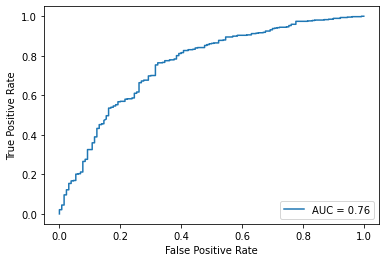

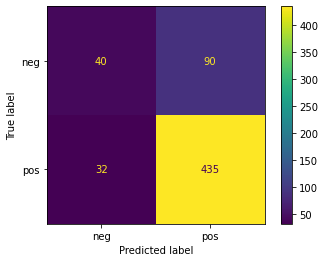

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve, RocCurveDisplay
y_pred = gs_clv.predict(X_test)
y_score = gs_clv.decision_function(X_test)
cm = confusion_matrix(y_test, y_pred, labels=gs_clv.classes_)

fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label='pos')
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
# print(roc_auc)

disp = ConfusionMatrixDisplay(cm, display_labels=gs_clv.classes_)
disp.plot()

In [32]:
# from mlxtend.plotting import plot_decision_regions
# y_score = []
# for y in y_test:
#     if y == 'pos':
#         y_score.append(1)
#     elif y == 'neg':
#         y_score.append(-1)

# plot_decision_regions(np.asarray(data_.toarray()), np.asarray(scores), clf=gs_clv)

In [33]:
text_clf.gamma = 0.1
text_clf.C = 10
text_clf.fit(X_train, y_train)
print(text_clf.support_)

[   0    2   12 ... 2375 2380 2381]


In [34]:
# text_clf.intercept_
# gs_clv.estimator.get_params()
print(text_clf.__dict__)

{'decision_function_shape': 'ovr', 'break_ties': False, 'kernel': 'rbf', 'degree': 3, 'gamma': 0.1, 'coef0': 0.0, 'tol': 0.001, 'C': 10, 'nu': 0.0, 'epsilon': 0.0, 'shrinking': True, 'probability': False, 'cache_size': 200, 'class_weight': None, 'verbose': False, 'max_iter': -1, 'random_state': None, '_sparse': True, 'n_features_in_': 4438, 'class_weight_': array([1., 1.]), 'classes_': array(['neg', 'pos'], dtype=object), '_gamma': 0.1, 'support_': array([   0,    2,   12, ..., 2375, 2380, 2381], dtype=int32), 'support_vectors_': <1465x4438 sparse matrix of type '<class 'numpy.float64'>'
	with 13266 stored elements in Compressed Sparse Row format>, 'intercept_': array([0.53672856]), '_n_support': array([478, 987], dtype=int32), '_probA': array([], dtype=float64), '_probB': array([], dtype=float64), 'fit_status_': 0, 'dual_coef_': <1x1465 sparse matrix of type '<class 'numpy.float64'>'
	with 1465 stored elements in Compressed Sparse Row format>, 'shape_fit_': (2384, 4438), '_intercept_'

In [35]:
print(text_clf.decision_function(X_test))

[ 0.08549582  0.25472515  0.30545009 -0.30553889  1.19623234  1.78180825
  0.94663626  0.32008361  0.99050347  0.13440599  0.83511253  0.99475486
  0.59210853  1.29581532  0.79937959  1.3450171   1.42918104  0.72970677
  1.60281193  1.10164403  0.85307    -1.70081019  1.32283603  0.68198807
  0.51687706  0.27158174  0.08116933  0.89658927  1.21779113  0.43939261
  0.5589991   0.48009912  0.83571684  1.31564659  0.1237772   1.15573267
  1.5822402   0.68589192  0.49790487  0.24798931  0.31935973  0.71743335
  0.66585259  0.1051013   0.84038274  1.42687994  0.97294294  0.21536448
  1.37023888  0.99981175  1.58156181  2.16457698  0.30507181  0.71483723
  1.23925435 -0.18051676 -3.07244903  0.93172415  0.36844179  0.88062932
  1.14149424  0.68810491  0.33820137  1.11074786  1.03308531  1.17777254
  1.11345154  0.03183257  0.59508295  0.78126858  0.09512763  0.25494116
  1.66105767  0.1086249   0.98123129  0.47147743  1.3358998  -0.05879331
  1.47864167  0.71415712  0.73877511 -0.05165786  1

In [36]:
print(text_clf.intercept_)

[0.53672856]


In [37]:
print(text_clf.support_vectors_)

  (0, 0)	0.13019239493358195
  (0, 158)	0.46852015505543004
  (0, 320)	0.2238086958604845
  (0, 468)	0.28347193512446084
  (0, 721)	0.05949248170221658
  (0, 1752)	0.34522318274966873
  (0, 2441)	0.39713262213543976
  (0, 3517)	0.49256152347253834
  (0, 3866)	0.3263410068964974
  (0, 4257)	0.05953239641942056
  (1, 721)	0.09506236540007021
  (1, 2881)	0.41270142671419524
  (1, 2891)	0.5556605022370048
  (1, 3710)	0.4145411760048121
  (1, 4241)	0.42852881752992317
  (1, 4257)	0.09512614467642781
  (1, 4285)	0.3838642570861257
  (2, 0)	0.1967618967081411
  (2, 339)	0.47596587538637863
  (2, 381)	0.43384840374613043
  (2, 721)	0.08991196102947711
  (2, 1778)	0.5838550219514905
  (2, 1808)	0.43525962897230697
  (2, 4257)	0.08997228479468344
  (3, 48)	0.7020014229414075
  :	:
  (1462, 2301)	0.2616362631127965
  (1462, 2959)	0.33447017106140264
  (1462, 3108)	0.3078703255413276
  (1462, 3551)	0.33447017106140264
  (1462, 4253)	0.2987891234344575
  (1462, 4257)	0.04543672849648923
  (1463, 0)

In [38]:
print(text_clf.dual_coef_)

  (0, 0)	-10.0
  (0, 1)	-10.0
  (0, 2)	-10.0
  (0, 3)	-8.81765268363906
  (0, 4)	-3.6130143841337428
  (0, 5)	-8.966005888827112
  (0, 6)	-6.7149650033198585
  (0, 7)	-10.0
  (0, 8)	-9.213139774559117
  (0, 9)	-10.0
  (0, 10)	-10.0
  (0, 11)	-10.0
  (0, 12)	-10.0
  (0, 13)	-10.0
  (0, 14)	-10.0
  (0, 15)	-10.0
  (0, 16)	-10.0
  (0, 17)	-10.0
  (0, 18)	-10.0
  (0, 19)	-10.0
  (0, 20)	-10.0
  (0, 21)	-10.0
  (0, 22)	-10.0
  (0, 23)	-10.0
  (0, 24)	-10.0
  :	:
  (0, 1440)	9.054556096072194
  (0, 1441)	3.1867143623548313
  (0, 1442)	7.309147919295532
  (0, 1443)	2.8886618923826477
  (0, 1444)	3.681012692807822
  (0, 1445)	1.9067713160999733
  (0, 1446)	3.209184408070363
  (0, 1447)	0.022174095457440417
  (0, 1448)	1.7240227779989337
  (0, 1449)	3.0328255236549717
  (0, 1450)	10.0
  (0, 1451)	6.834980712272205
  (0, 1452)	3.8817063516351764
  (0, 1453)	2.871730265023232
  (0, 1454)	3.496347207428536
  (0, 1455)	2.639711562757942
  (0, 1456)	6.204025603407412
  (0, 1457)	6.108532326188694
  

In [39]:
print(text_clf.class_weight_)

[1. 1.]


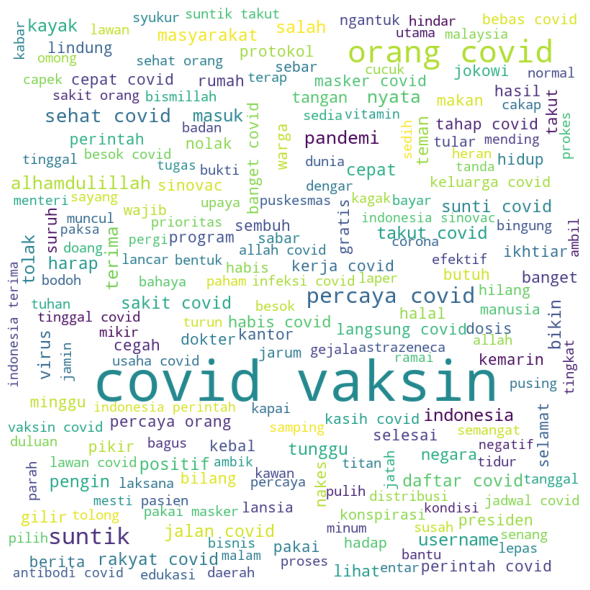

{'covid vaksin': 1.0, 'orang covid': 0.11039837947332883, 'suntik': 0.05638082376772451, 'percaya covid': 0.05064145847400405, 'sehat covid': 0.038149898717083054, 'nyata': 0.03612424037812289, 'pandemi': 0.03578663065496286, 'alhamdulillah': 0.03443619176232275, 'terima': 0.03308575286968265, 'tolak': 0.03139770425388251, 'indonesia': 0.03038487508440243, 'masuk': 0.029709655638082377, 'takut covid': 0.029709655638082377, 'kayak': 0.02937204591492235, 'username': 0.02937204591492235, 'salah': 0.02937204591492235, 'virus': 0.028021607022282242, 'rakyat covid': 0.028021607022282242, 'harap': 0.027683997299122215, 'sunti covid': 0.027346387575962187, 'masyarakat': 0.026671168129642132, 'teman': 0.02633355840648211, 'positif': 0.02633355840648211, 'daftar covid': 0.02599594868332208, 'jalan covid': 0.025658338960162053, 'sakit covid': 0.025320729237002026, 'cepat': 0.024307900067521943, 'pengin': 0.023295070898041864, 'bikin': 0.02261985145172181, 'tunggu': 0.02261985145172181, 'banget': 

In [40]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
words = text_vect.inverse_transform(data_)
words = ' '.join(' '.join(word) for word in words)
words = ' '.join(analyzer(words))
# print(analyzer(words))
# words = np.asanyarra
# print(' '.join(analyzer(words)))
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white',
                      stopwords=stop+tags,
                      regexp=r'(?u)\[\w{3,}\]|\b\w{4,}\-?\w+\b',
                      min_font_size = 11).generate_from_text(words)
# words = pd.DataFrame(text_vect.vocabulary_, index=[0]).transpose()
# wordcloud = WordCloud()
# wordcloud.generate_from_frequencies(text_vect.vocabulary_)

# plot the WordCloud image   
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
print(wordcloud.words_)